In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
df=df.drop(columns='id')

<Axes: xlabel='loan_status', ylabel='proportion'>

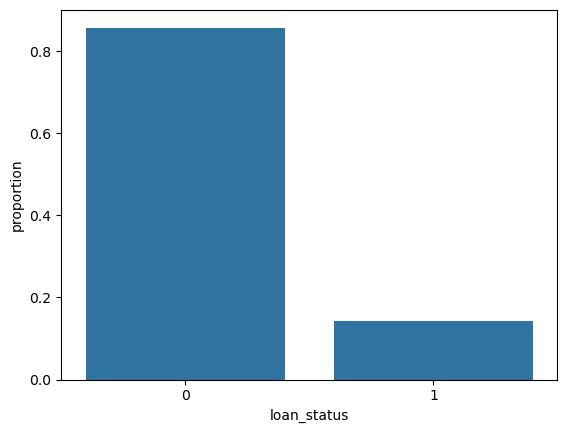

In [6]:
sns.countplot(df,x="loan_status",stat="proportion") #Checking for  unbalanced proportion

Preprocessing on the Train Data

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
cat_col=df.select_dtypes(include=["object"]).columns.tolist()

In [11]:
encoder=OneHotEncoder(sparse_output=False)

In [12]:
O_H_E=encoder.fit_transform(df[cat_col])

In [13]:
O_H_E.shape

(58645, 19)

In [14]:
one_hot_df = pd.DataFrame(O_H_E, columns=encoder.get_feature_names_out(cat_col))

In [15]:
df_encoded = pd.concat([df, one_hot_df], axis=1)

In [16]:
df_encoded = df_encoded.drop(cat_col, axis=1)

In [17]:
X=df_encoded.drop("loan_status",axis=1)

In [18]:
y=df_encoded["loan_status"]

In [19]:
from imblearn.combine import SMOTETomek

In [20]:
smk=SMOTETomek()

In [21]:
X_res,y_res=smk.fit_resample(X,y)

In [22]:
X_res.shape

(97506, 26)

In [23]:
y_res.shape

(97506,)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
scaler.fit(X_res)

StandardScaler()

In [27]:
Scaled_feat=scaler.transform(X_res)

In [28]:
X_sc=pd.DataFrame(Scaled_feat,columns=X_res.columns)

In [29]:
X_sc.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,1.720535,-0.672870,-1.157146,-0.672450,-0.076164,-0.225328,2.223624,-0.708747,-0.042211,-0.185743,...,-0.437005,-0.606807,1.577051,-0.511712,-0.546038,-0.233145,-0.086577,-0.042095,0.572581,-0.572581
1,-0.918524,-0.040949,0.477998,-1.004894,0.520325,-1.118601,-0.932261,-0.708747,-0.042211,5.498434,...,-0.437005,-0.606807,-0.706156,2.244325,-0.546038,-0.233145,-0.086577,-0.042095,0.572581,-0.572581
2,0.313037,-0.859437,1.023046,-0.672450,-0.906759,0.131980,1.171662,-0.708747,-0.042211,5.498434,...,-0.437005,1.748153,-0.706156,-0.511712,-0.546038,-0.233145,-0.086577,-0.042095,0.572581,-0.572581
3,0.488974,0.380332,2.658190,0.324880,-0.198028,-0.225328,-0.143290,-0.708747,-0.042211,-0.185743,...,2.566088,-0.606807,1.577051,-0.511712,-0.546038,-0.233145,-0.086577,-0.042095,0.572581,-0.572581
4,-0.918524,0.079417,-0.612098,-0.672450,-1.541731,-0.850619,-0.669271,-0.708747,-0.042211,-0.185743,...,-0.437005,1.748153,-0.706156,-0.511712,-0.546038,-0.233145,-0.086577,-0.042095,0.572581,-0.572581


In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
knn_cv=KNeighborsClassifier(n_neighbors=3)

In [33]:
cv_scores = cross_val_score(knn_cv, X_sc, y_res, cv=10)

In [34]:
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.88452466 0.92062353 0.95549174 0.96092708 0.95579941 0.95672239
 0.95794872 0.95651282 0.95476923 0.9574359 ]
cv_scores mean:0.9460755478070624


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
X_train1,X_test1,y_train1,y_test1= train_test_split(X_sc,y_res,test_size=0.30)

In [37]:
knn_cv.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=3)

In [38]:
pre=knn_cv.predict(X_test1)

In [39]:
print(confusion_matrix(y_test1,pre))

[[13678   844]
 [  960 13770]]


In [40]:
print(classification_report(y_test1,pre))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     14522
           1       0.94      0.93      0.94     14730

    accuracy                           0.94     29252
   macro avg       0.94      0.94      0.94     29252
weighted avg       0.94      0.94      0.94     29252



Preprocessing the Test Dataset

In [43]:
df_t=pd.read_csv("test.csv")

In [44]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [45]:
df1=df_t.drop(columns='id')

In [46]:
cat_col_t=df1.select_dtypes(include=["object"]).columns.tolist()
encoder_test=OneHotEncoder(sparse_output=False)
O_H_E_t=encoder_test.fit_transform(df1[cat_col])
one_hot_df_t = pd.DataFrame(O_H_E_t, columns=encoder_test.get_feature_names_out(cat_col_t))
df_encoded_t = pd.concat([df1, one_hot_df_t], axis=1)
df_encoded_t = df_encoded_t.drop(cat_col_t, axis=1)

In [47]:
scaler.fit(df_encoded_t)

StandardScaler()

In [48]:
Scaled_feat_t=scaler.transform(df_encoded_t)

In [49]:
X_sc_t=pd.DataFrame(Scaled_feat_t,columns=df_encoded_t.columns)

In [51]:
pre_t=knn_cv.predict(X_sc_t)

In [52]:
df_pred=pd.DataFrame(pre_t)

In [53]:
submission = pd.concat([df_t,df_pred], axis=1)

In [54]:
submission.rename(columns = {0:'loan_status_pred'}, inplace = True)

In [55]:
submission=submission[["id","loan_status_pred"]]

In [56]:
submission.to_csv('submission.csv', index=False)